# Question-1 
## Exploratory Data Analysis

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve
import seaborn as sns
%matplotlib inline

In [65]:
dt= pd.read_csv(r'C:\Users\DELL_PC\Desktop\IIT Bombay\Machine Learning\assignment-rw\FlightDelays.csv')
dt

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,RU,644,EWR,199,1/31/2004,2761,DCA,0,6,31,N15555,ontime
2197,1700,RU,1653,EWR,213,1/31/2004,2497,IAD,0,6,31,N16976,ontime
2198,1600,RU,1558,EWR,199,1/31/2004,2361,DCA,0,6,31,N14902,ontime
2199,1359,RU,1403,EWR,199,1/31/2004,2216,DCA,0,6,31,N16961,ontime


In [46]:
dt.rename(columns = {'Flight Status':'Flight_Status'}, inplace = True)
dt['CRS_DEP_TIME']=dt['CRS_DEP_TIME']//100
dt['DEP_TIME']=dt['DEP_TIME']//100
dataset=dt
dat=dt.copy()

In [62]:
dataset.isnull().sum()

CRS_DEP_TIME     0
CARRIER          0
DEP_TIME         0
DEST             0
DISTANCE         0
FL_DATE          0
FL_NUM           0
ORIGIN           0
Weather          0
DAY_WEEK         0
DAY_OF_MONTH     0
TAIL_NUM         0
Flight_Status    0
dtype: int64

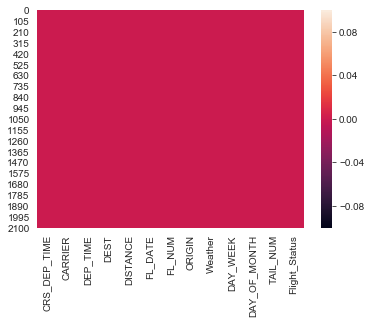

In [49]:
sns.heatmap(dataset.isnull())

C:\Users\DELL_PC\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\DELL_PC\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


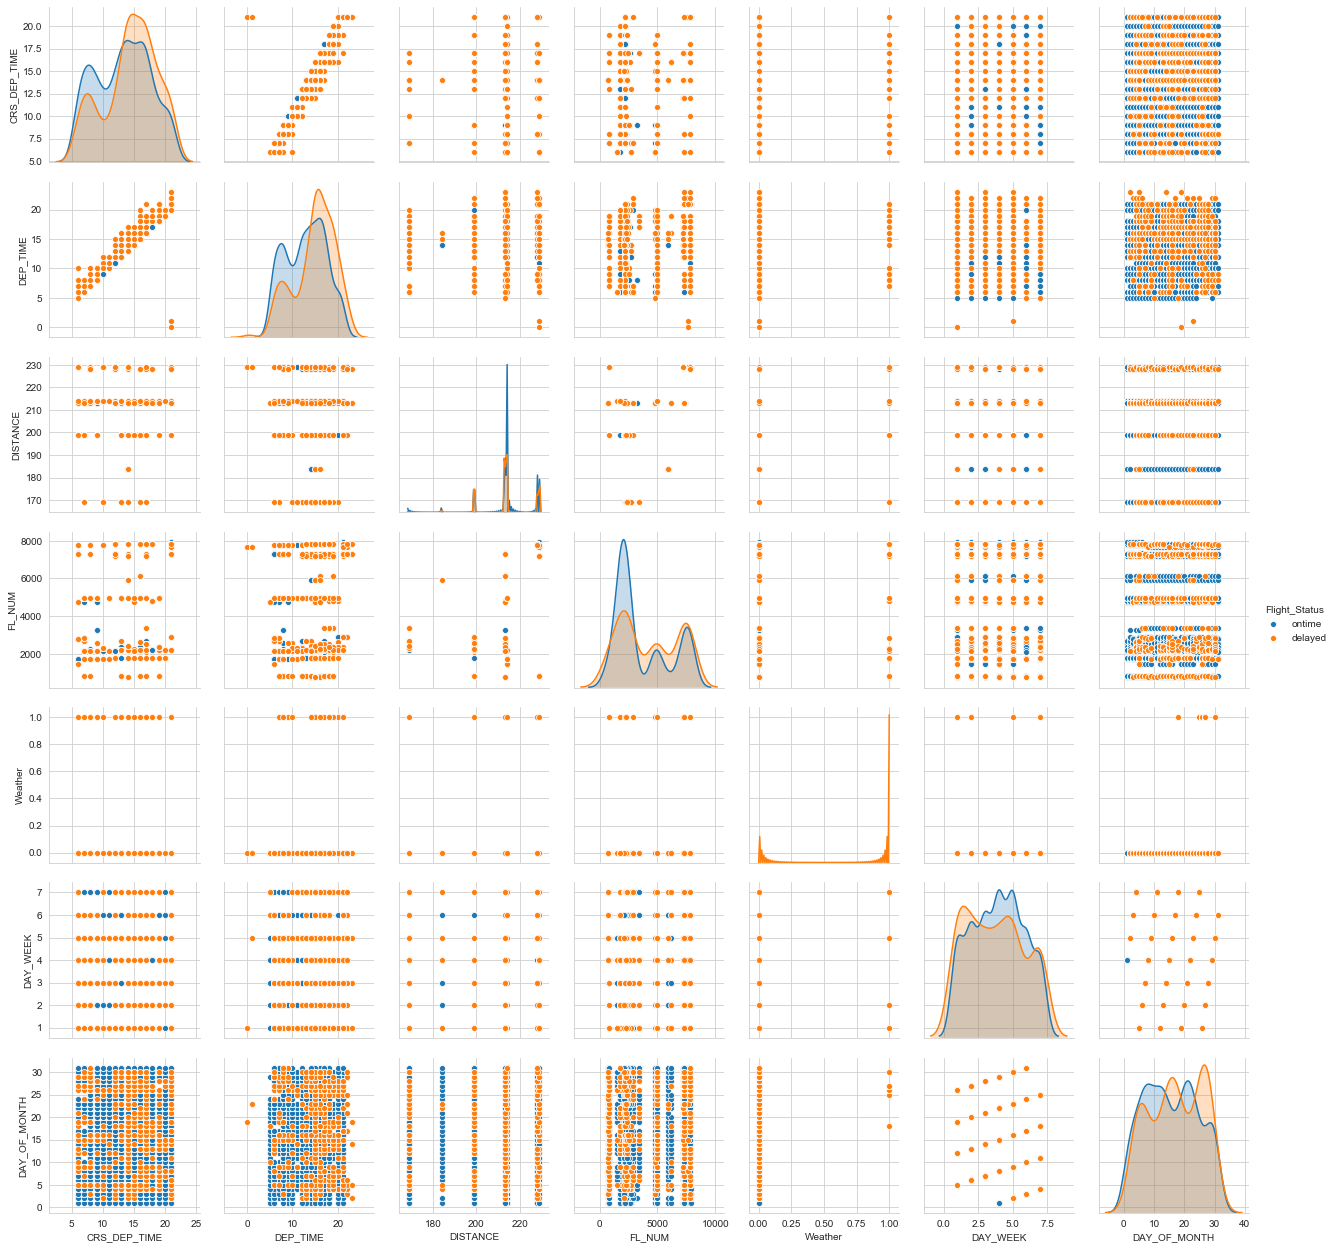

In [51]:
sns.pairplot(dataset,hue='Flight_Status')

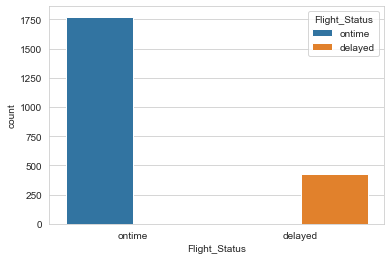

In [52]:
sns.set_style('whitegrid')
sns.countplot(x='Flight_Status',hue='Flight_Status',data=dataset)

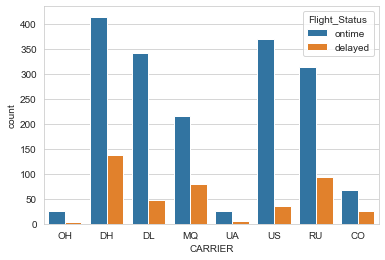

In [53]:
sns.set_style('whitegrid')
sns.countplot(x='CARRIER',hue='Flight_Status',data=dataset)

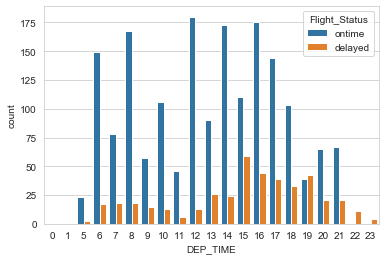

In [54]:
sns.set_style('whitegrid')
sns.countplot(x='DEP_TIME',hue='Flight_Status',data=dataset)

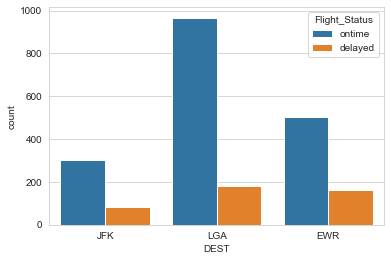

In [55]:
sns.set_style('whitegrid')
sns.countplot(x='DEST',hue='Flight_Status',data=dataset)

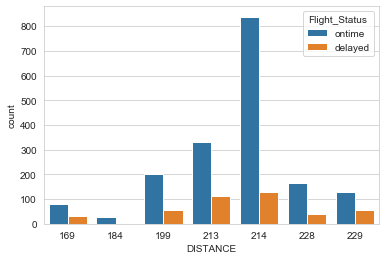

In [56]:
sns.set_style('whitegrid')
sns.countplot(x='DISTANCE',hue='Flight_Status',data=dataset)

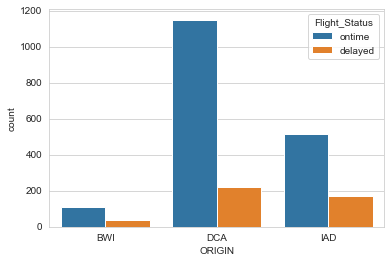

In [57]:
sns.set_style('whitegrid')
sns.countplot(x='ORIGIN',hue='Flight_Status',data=dataset)

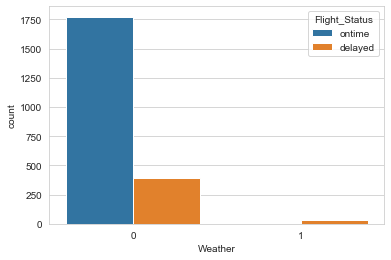

In [58]:
sns.set_style('whitegrid')
sns.countplot(x='Weather',hue='Flight_Status',data=dataset)

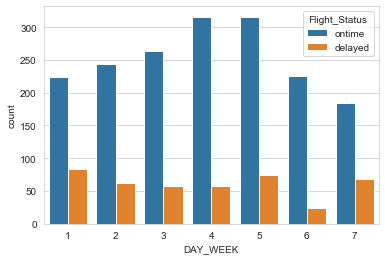

In [59]:
sns.set_style('whitegrid')
sns.countplot(x='DAY_WEEK',hue='Flight_Status',data=dataset)

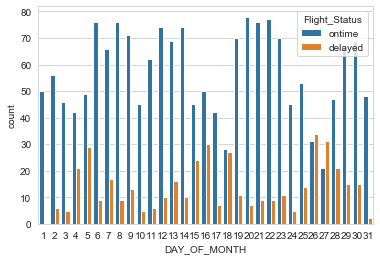

In [60]:
sns.set_style('whitegrid')
sns.countplot(x='DAY_OF_MONTH',hue='Flight_Status',data=dataset)

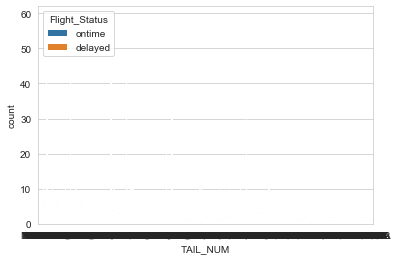

In [66]:
sns.set_style('whitegrid')
sns.countplot(x='TAIL_NUM',hue='Flight_Status',data=dataset)

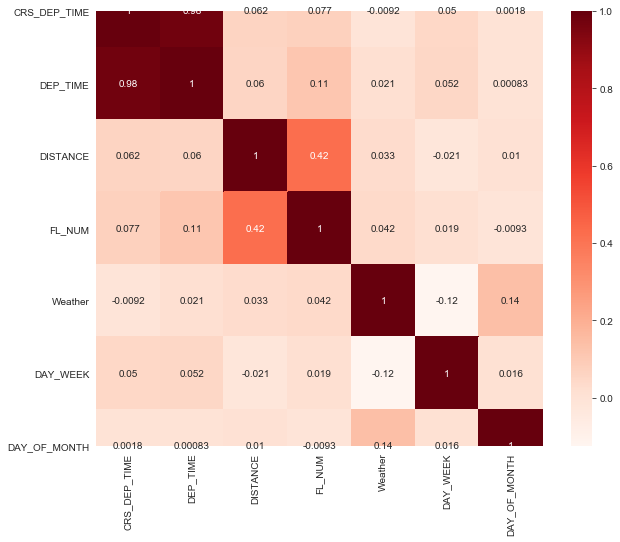

In [63]:
##Correlation among features##
plt.figure(figsize=(10,8))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Question-2
## i. Data Preprocessing

### - Removing unnecessary columns

In [17]:
dataset.drop(['FL_DATE','CRS_DEP_TIME','TAIL_NUM'],axis=1,inplace=True)
dataset

,CARRIER,DEP_TIME,DEST,DISTANCE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,Flight_Status
0,OH,14,JFK,184,5935,BWI,0,4,1,ontime
1,DH,16,JFK,213,6155,DCA,0,4,1,ontime
2,DH,12,LGA,229,7208,IAD,0,4,1,ontime
3,DH,17,LGA,229,7215,IAD,0,4,1,ontime
4,DH,10,LGA,229,7792,IAD,0,4,1,ontime
...,...,...,...,...,...,...,...,...,...,...
2196,RU,6,EWR,199,2761,DCA,0,6,31,ontime
2197,RU,16,EWR,213,2497,IAD,0,6,31,ontime
2198,RU,15,EWR,199,2361,DCA,0,6,31,ontime
2199,RU,14,EWR,199,2216,DCA,0,6,31,ontime


### -Generating Dummy Variables

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
## Applying label encoding to FL_NUM, DISTANCE, and DAY_OF_MONTH columns
dataset['FL_NUM']=le.fit_transform(dataset['FL_NUM'])
dataset['DISTANCE']=le.fit_transform(dataset['DISTANCE'])
dataset['DAY_OF_MONTH']=le.fit_transform(dataset['DAY_OF_MONTH'])

## Applying Onehot encoding to remaining columns and creating dummy variables
dataset = pd.get_dummies(dataset, columns = ['DAY_WEEK','CARRIER','DEP_TIME','DEST','ORIGIN','Flight_Status'],drop_first = True)
dataset.rename(columns = {'Flight_Status_ontime':'Flight_Status'}, inplace = True)
dataset

,DISTANCE,FL_NUM,Weather,DAY_OF_MONTH,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,DAY_WEEK_6,DAY_WEEK_7,...,DEP_TIME_19,DEP_TIME_20,DEP_TIME_21,DEP_TIME_22,DEP_TIME_23,DEST_JFK,DEST_LGA,ORIGIN_DCA,ORIGIN_IAD,Flight_Status
0,1,79,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,3,80,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,6,81,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,1
3,6,83,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,1
4,6,93,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,2,60,0,30,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2197,3,53,0,30,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2198,2,49,0,30,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2199,2,42,0,30,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


## ii. Preparing the logistic regression model

### -Dividing the dataset into training and testing data 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Flight_Status',axis=1), dataset['Flight_Status'], test_size=0.4, random_state=1)

### -Training and Prediction 

In [20]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

C:\Users\DELL_PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
accuracy=confusion_matrix(y_test,y_pred)
accuracy

array([[ 44, 123],
       [ 13, 701]], dtype=int64)

In [23]:
accuracy=accuracy_score(y_test,y_pred)
print('% Accuracy =',accuracy*100)

% Accuracy = 84.56299659477867


### -Evaluating the model

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.26      0.39       167
           1       0.85      0.98      0.91       714

    accuracy                           0.85       881
   macro avg       0.81      0.62      0.65       881
weighted avg       0.84      0.85      0.81       881



# Question-3

## Interpreting model coefficients

In [24]:
log_odds = classifier.coef_[0]
pd.DataFrame(log_odds, 
             X_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
DEP_TIME_12,1.667479
DEP_TIME_5,1.287599
DEP_TIME_8,1.215087
CARRIER_DL,1.172257
CARRIER_US,1.141316
DAY_WEEK_6,0.984702
DEP_TIME_14,0.823745
DAY_WEEK_4,0.600512
DEP_TIME_10,0.575491
DEP_TIME_6,0.572681


# Question-4

## Feature Selection

### Mutual information based feature selection

In [26]:
from sklearn.feature_selection import mutual_info_regression as mi
x_feature = dataset.iloc[:,:-1]
y_label = dataset.iloc[:,-1]
MI = mi(x_feature, y_label)
MI
MI = pd.Series(MI)
MI.index = pd.Series(x_feature.columns)
imp_feat =MI.sort_values(ascending= False)
print("shape of feature importance table:", imp_feat.shape)
imp_feat

shape of feature importance table: (41,)


DAY_WEEK_6      0.054609
DEP_TIME_12     0.042963
DEP_TIME_22     0.028344
DEP_TIME_21     0.023591
Weather         0.020850
DEP_TIME_5      0.019087
DAY_WEEK_4      0.018720
DAY_WEEK_7      0.018707
DEP_TIME_7      0.018598
DAY_WEEK_5      0.016078
DEP_TIME_17     0.015880
DAY_OF_MONTH    0.013821
DEP_TIME_14     0.013608
CARRIER_DL      0.012735
DEP_TIME_8      0.011856
DEP_TIME_23     0.011190
CARRIER_RU      0.009571
DEP_TIME_20     0.008398
CARRIER_MQ      0.008377
DEP_TIME_10     0.007993
DEST_JFK        0.004854
ORIGIN_DCA      0.004502
FL_NUM          0.004355
CARRIER_DH      0.002992
DEP_TIME_9      0.002766
DEP_TIME_6      0.002499
CARRIER_US      0.002451
DISTANCE        0.001706
CARRIER_OH      0.000000
CARRIER_UA      0.000000
DEP_TIME_1      0.000000
DEP_TIME_11     0.000000
DEP_TIME_13     0.000000
DEP_TIME_15     0.000000
DEP_TIME_16     0.000000
DAY_WEEK_3      0.000000
DAY_WEEK_2      0.000000
DEP_TIME_18     0.000000
DEP_TIME_19     0.000000
DEST_LGA        0.000000


### Tree Classifier

C:\Users\DELL_PC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


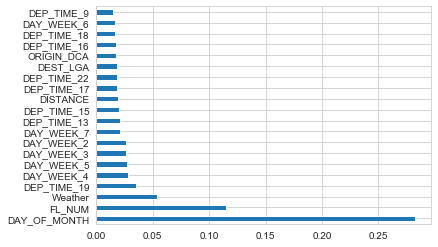

In [27]:
X = dataset.drop('Flight_Status',axis=1) 
y = dataset['Flight_Status']    
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


# Question-5
## Fitting a new model with relevant variables

In [28]:
dataset_2 = dataset[['FL_NUM','DAY_OF_MONTH','Weather','DEP_TIME_19','DISTANCE','DAY_WEEK_5','DAY_WEEK_4','DAY_WEEK_3','DAY_WEEK_7','DAY_WEEK_2','DAY_WEEK_6','DEP_TIME_15','DEP_TIME_17','DEP_TIME_16','DEP_TIME_15','DEP_TIME_13','DEP_TIME_22','DEP_TIME_18','DEP_TIME_14','DEST_LGA','ORIGIN_DCA','Flight_Status']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(dataset_2.drop('Flight_Status',axis=1), dataset_2['Flight_Status'], test_size=0.4, random_state=1)

In [30]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

C:\Users\DELL_PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
accuracy=confusion_matrix(y_test,y_pred)
accuracy

array([[ 38, 129],
       [ 12, 702]], dtype=int64)

In [33]:
accuracy=accuracy_score(y_test,y_pred)
print('% Accuracy =',accuracy*100)

% Accuracy = 83.99545970488082
